In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
anime = pd.read_csv('/kaggle/input/anime-recommendation-dataset/anime_recommendation_dataset.csv')
print(anime.head())
print(anime.info())
print(anime.describe())

                             title  \
0                     Cowboy Bebop   
1  Cowboy Bebop: Tengoku no Tobira   
2                           TRIGUN   
3               Witch Hunter ROBIN   
4                   Bouken Ou Beet   

                                            synopsis  \
0  Enter a world in the distant future, where Bou...   
1  As the Cowboy Bebop crew travels the stars, th...   
2  Vash the Stampede is a wanted man with a habit...   
3  Robin Sena is a powerful craft user drafted in...   
4  It is the dark century and the people are suff...   

                                     genres  episodes  score  \
0          Action, Adventure, Drama, Sci-Fi      26.0     86   
1            Action, Drama, Mystery, Sci-Fi       1.0     82   
2  Action, Adventure, Comedy, Drama, Sci-Fi      26.0     80   
3      Action, Drama, Mystery, Supernatural      26.0     68   
4          Adventure, Fantasy, Supernatural      52.0     65   

                                          charact

In [2]:
# Check for missing values
print("Missing Values:\n", anime.isnull().sum())
anime.drop_duplicates(inplace=True)
anime['genres'] = anime['genres'].fillna('Unknown')
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')
anime['episodes'] = anime['episodes'].fillna(0).astype(int)
anime['score'] = anime['score'].fillna(anime['score'].mean())
if 'rating' in anime.columns:
    anime['rating'] = anime['rating'].fillna('Unknown')

print("Missing values after cleaning:\n", anime.isnull().sum())

Missing Values:
 title         0
synopsis      0
genres        0
episodes      1
score         0
characters    2
dtype: int64
Missing values after cleaning:
 title         0
synopsis      0
genres        0
episodes      0
score         0
characters    2
dtype: int64


In [5]:
# Summary statistics
print(anime.describe())

# Unique anime types
print("Unique Anime Types:", anime['genres'].unique())

# Top 5 anime by score
print(anime[['title', 'score']].sort_values(by='score', ascending=False).head())

         episodes       score
count  200.000000  200.000000
mean    24.300000   69.140000
std     26.773947    8.167247
min      0.000000   38.000000
25%     12.000000   64.000000
50%     24.000000   69.000000
75%     26.000000   74.250000
max    220.000000   88.000000
Unique Anime Types: ['Action, Adventure, Drama, Sci-Fi' 'Action, Drama, Mystery, Sci-Fi'
 'Action, Adventure, Comedy, Drama, Sci-Fi'
 'Action, Drama, Mystery, Supernatural' 'Adventure, Fantasy, Supernatural'
 'Action, Comedy, Sports' 'Comedy, Drama, Romance, Slice of Life'
 'Comedy, Slice of Life, Sports' 'Action, Drama, Sports'
 'Drama, Horror, Mystery, Psychological, Thriller'
 'Action, Adventure, Comedy, Drama, Fantasy, Supernatural'
 'Action, Adventure, Comedy, Drama, Fantasy' 'Action, Sports'
 'Comedy, Romance, Slice of Life'
 'Action, Adventure, Comedy, Ecchi, Sci-Fi'
 'Action, Drama, Psychological, Sci-Fi'
 'Action, Drama, Horror, Sci-Fi, Supernatural' 'Comedy' 'Action, Sci-Fi'
 'Action, Drama, Mecha, Mystery, Psy

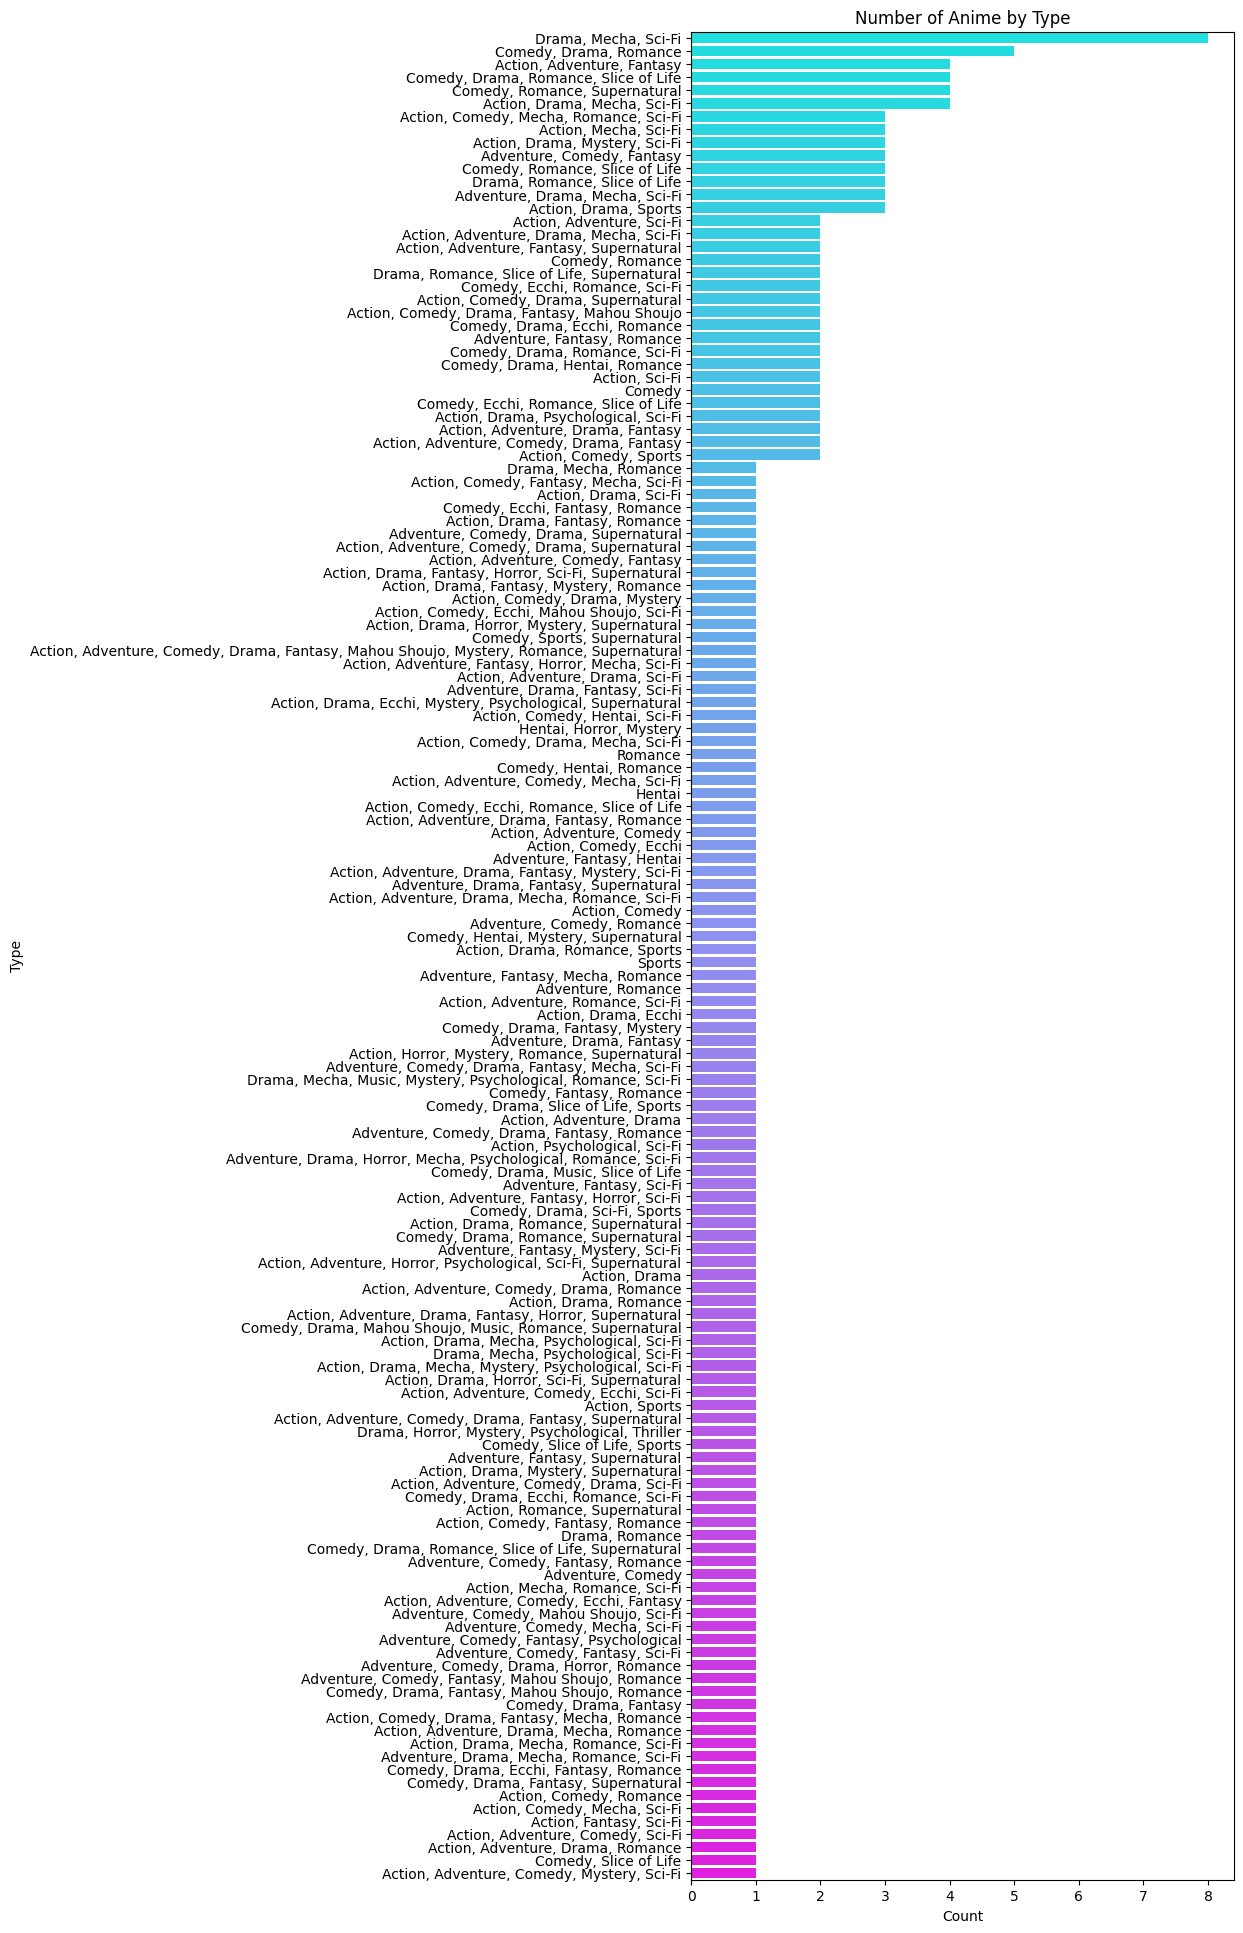

In [7]:
plt.figure(figsize=(7,24))
sns.countplot(y='genres', data=anime, order=anime['genres'].value_counts().index, palette='cool')
plt.title('Number of Anime by Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

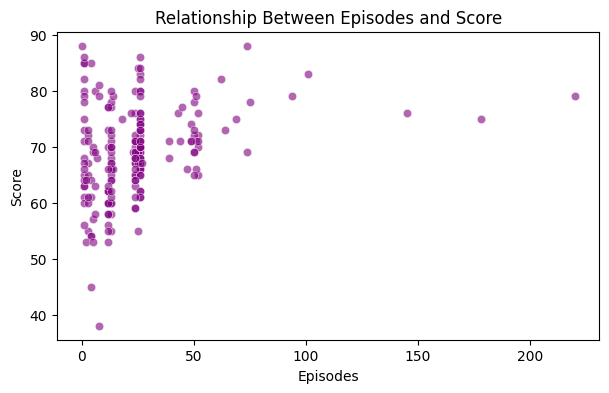

In [8]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='episodes', y='score', data=anime, alpha=0.6, color='purple')
plt.title('Relationship Between Episodes and Score')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

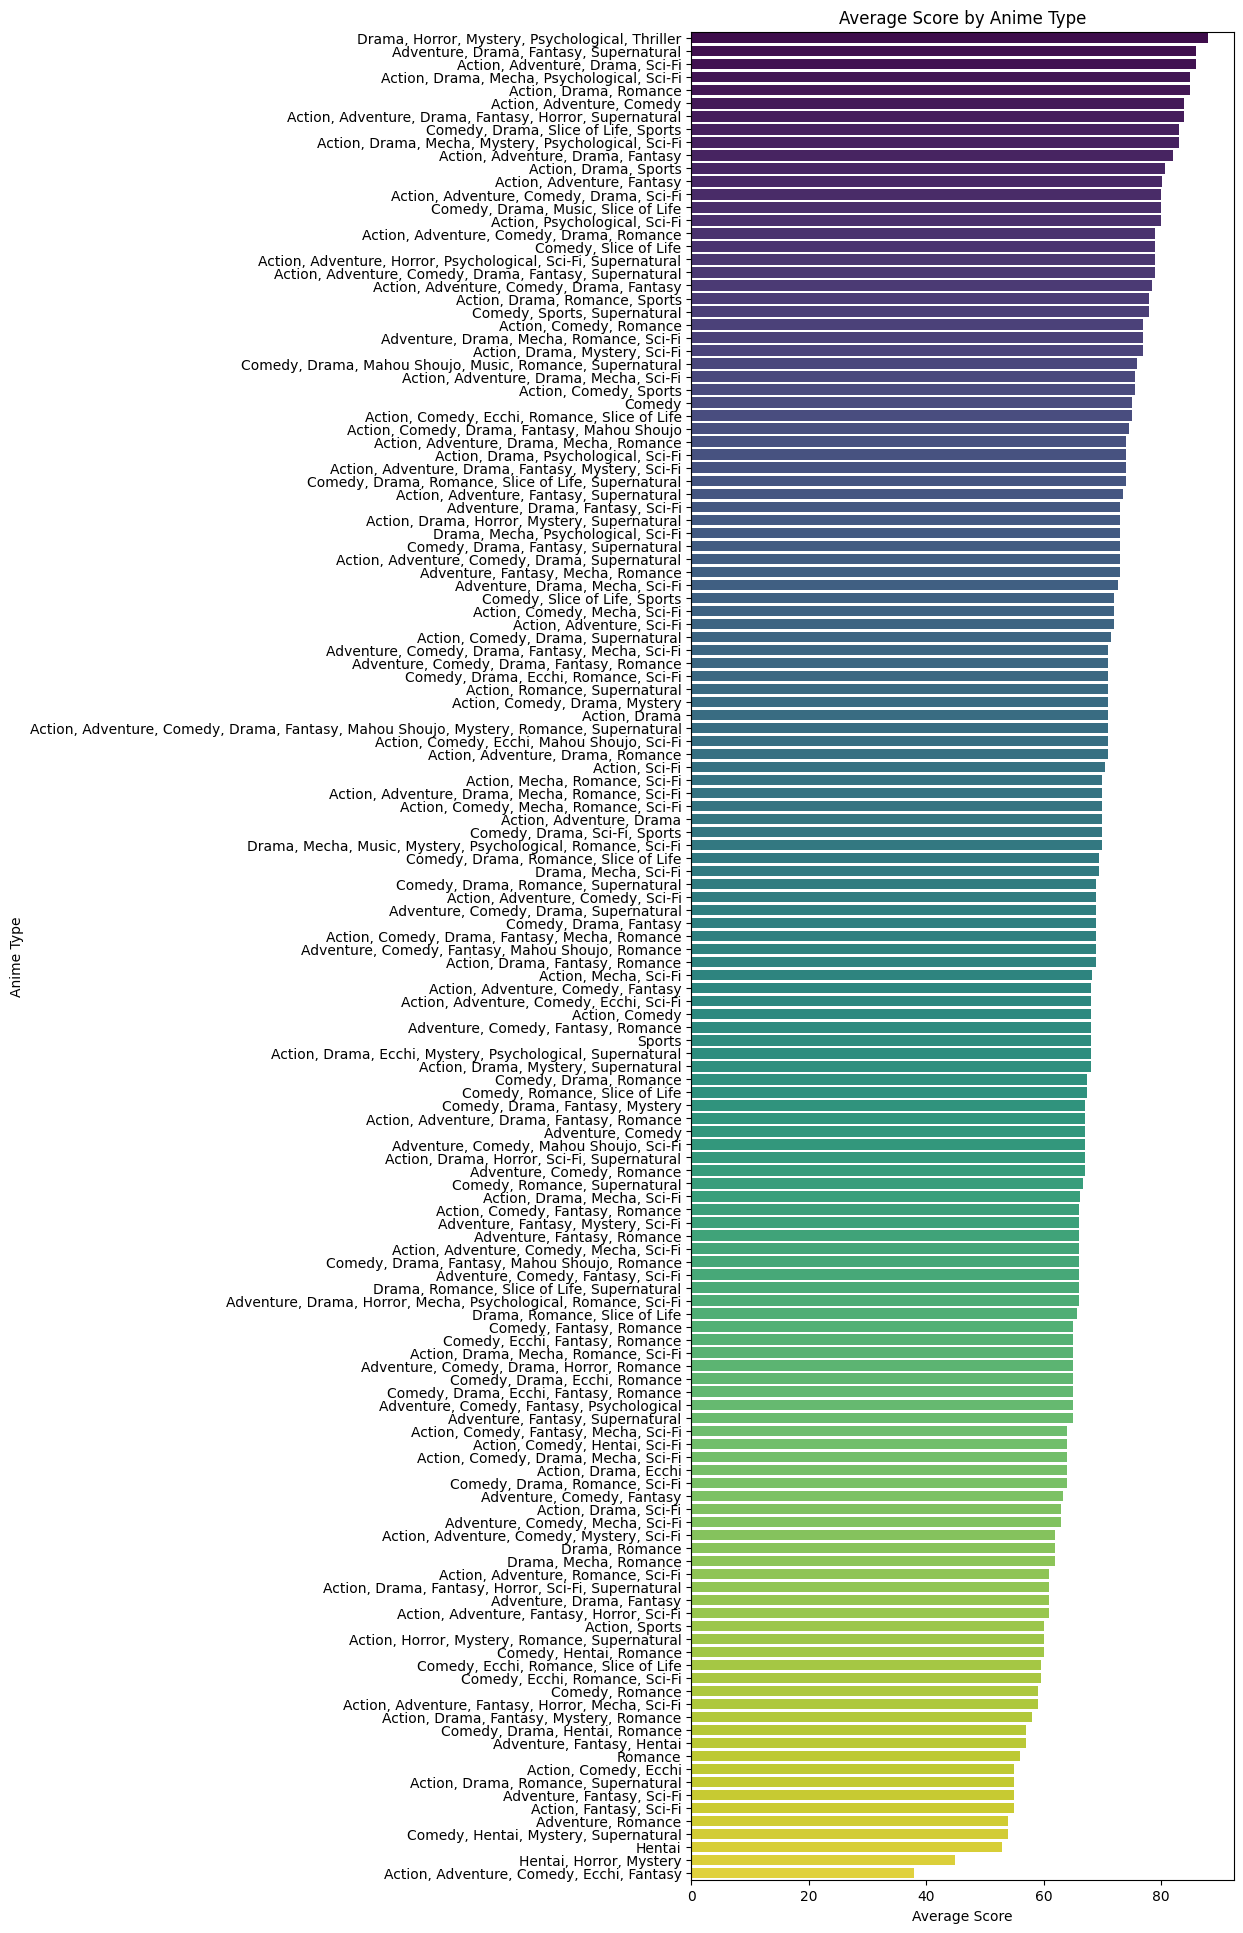

In [10]:
plt.figure(figsize=(7,24))
avg_score = anime.groupby('genres')['score'].mean().reset_index().sort_values(by='score', ascending=False)
sns.barplot(x='score', y='genres', data=avg_score, palette='viridis')
plt.title('Average Score by Anime Type')
plt.xlabel('Average Score')
plt.ylabel('Anime Type')
plt.show()

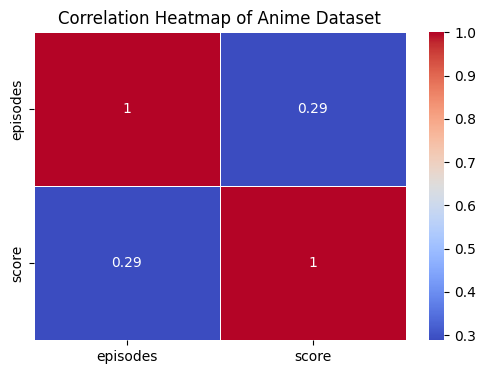

In [11]:
plt.figure(figsize=(6,4))
corr = anime.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Anime Dataset')
plt.show()

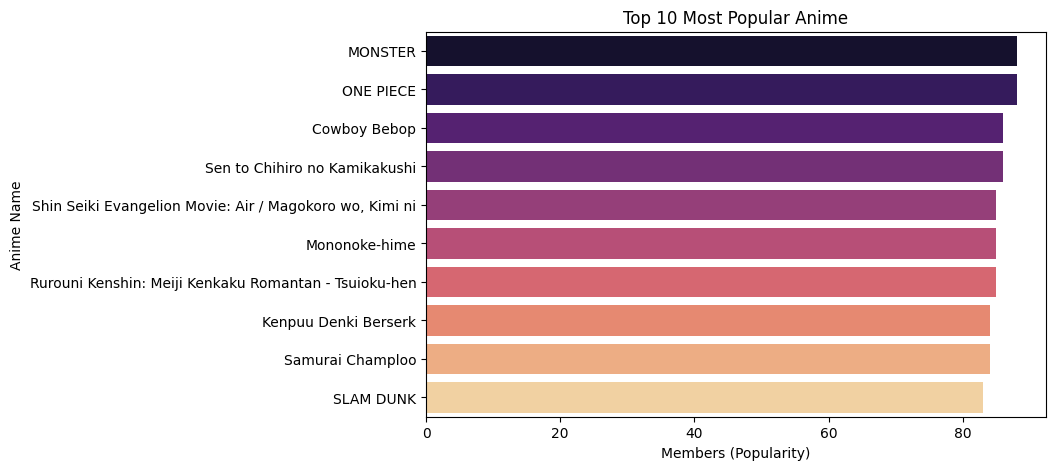

In [14]:
plt.figure(figsize=(8,5))
top_popular = anime.sort_values('score', ascending=False).head(10)
sns.barplot(x='score', y='title', data=top_popular, palette='magma')
plt.title('Top 10 Most Popular Anime')
plt.xlabel('Members (Popularity)')
plt.ylabel('Anime Name')
plt.show()

In [15]:
missing = anime.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

characters    2
dtype: int64


In [16]:
print("Average Score:", round(anime['score'].mean(), 2))
print("Most Common Anime Type:", anime['genres'].mode()[0])
print("Average Episodes per Anime:", round(anime['episodes'].mean(), 1))

Average Score: 69.14
Most Common Anime Type: Drama, Mecha, Sci-Fi
Average Episodes per Anime: 24.3


### Insights
### 1. Average Score: 69.14
### 2. Most Common Anime Type: Drama, Mecha, Sci-Fi
### 3. Average Episodes per Anime: 24.3